In [8]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import cifar10
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    return array


def noise(array):
    """Adds random noise to each image in the supplied array."""
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

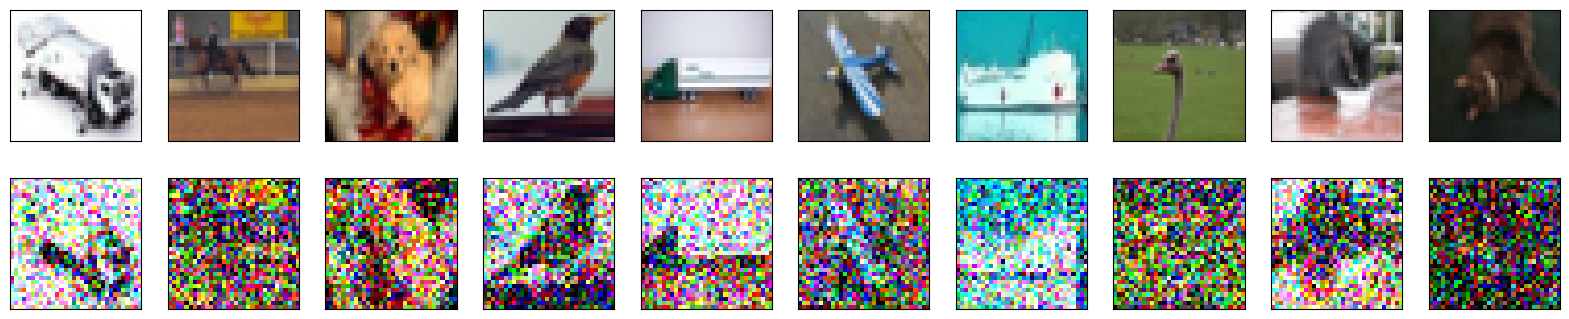

In [9]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = cifar10.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [13]:
train_data.shape

(50000, 32, 32, 3)

In [16]:
input = layers.Input(shape=(32,32,3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 16, 16, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - loss: 0.5837 - val_loss: 0.5661
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - loss: 0.5630 - val_loss: 0.5621
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - loss: 0.5601 - val_loss: 0.5616
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - loss: 0.5588 - val_loss: 0.5590
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - loss: 0.5579 - val_loss: 0.5583
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - loss: 0.5573 - val_loss: 0.5577
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.5568 - val_loss: 0.5573
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.5564 - val_loss: 0.5572
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 0.5561 - val_loss: 0.5566
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.5558 - val_loss: 0.5567
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.5555 - val_loss: 0.5562
Epoch 12/50
391/391 ━━━━━━━━━━

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)